<img src="https://www.mercari.com/assets/img/help_center/us/ogp.png"/>

# Mercari Price Suggestion Challenge
***
### Can you automatically suggest product prices to online sellers?

**Product pricing gets even harder at scale**, considering just how many products are sold online. Clothing has strong seasonal pricing trends and is heavily influenced by brand names, while electronics have fluctuating prices based on product specs.

**Mercari**, Japan’s biggest community-powered shopping app, knows this problem deeply. They’d like to offer pricing suggestions to sellers, but this is tough because their sellers are enabled to put just about anything, or any bundle of things, on Mercari's marketplace.

In this competition, Mercari’s challenging you to **build an algorithm that automatically suggests the right product prices**. You’ll be provided user-inputted text descriptions of their products, including details like product category name, brand name, and item condition.

### Dataset Features

- **ID**: the id of the listing
- **Name:** the title of the listing
- **Item Condition:** the condition of the items provided by the seller
- **Category Name:** category of the listing
- **Brand Name:** brand of the listing
- **Shipping:** whether or not shipping cost was provided
- **Item Description:** the full description of the item
- **Price:** the price that the item was sold for. This is the target variable that you will predict. The unit is USD.

**Work on supply and demand**

**Source:** https://www.kaggle.com/c/mercari-price-suggestion-challenge

<img src = "https://cdn.dribbble.com/users/56196/screenshots/2281553/mobile-dribbble.gif"/>

# Representing and Mining Text
***
Since, text is the most **unstructured** form of all the available data, various types of noise are present in it and the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text pre-processing**.

### Fundamental Concepts 

The importance of constructing mining-friendly data representations; Representation of text for data mining. 

### Important Terminologies
- **Document**: One piece of text. It could be a single sentence, a paragraph, or even a full page report. 
- **Tokens**: Also known as terms. It is simply just a word. So many tokens form a document. 
- **Corpus**: A collection of documents. 
- **Term Frequency (TF)**: Measures how often a term is in a single document
- **Inverse Document Frequency (IDF)**: distribution of a term over a corpus

### Pre-Processing Techniques
- **Stop Word Removal:** stop words are terms that have little no meaning in a given text. Think of it as the "noise" of data. Such terms include the words, "the", "a", "an", "to", and etc...
- **Bag of Words Representation: ** treats each word as a feature of the document

- **TFIDF**: a common value representation of terms. It boosts or weighs words that have low occurences. For example, if the word "play" is common, then there is little to no boost. But if the word "mercari" is rare, then it has more boosts/weight. 

- **N-grams**: Sequences of adjacent words as terms. For example, since a word by itself may have little to no value, but if you were to put two words together and analyze it as a pair, then it might add more meaning. For example, "iPhone" VS "iPhone Charger"

- **Stemming and Lemmatization**: Get the root meaning of the word

- **Topic Models**: A type of model that represents a set of topics from a sequence of words. 

# Table of Content
***
### Define the Problem:

- [What's the Business Goal?](#map_of_newyork)

- [How will the solution be used?](#asian_white_geomap)

- [How to frame the problem?](#black_hispanic_geomap)

- [What metric are we optimizing?](#black_hispanic_geomap)

### Descriptive Statistics:
- [Observe Training Statistics](#correlation)

- [Simple Data Inspection](#correlation)

- [Missing Value Treatment](#correlation)


### Exploratory Data Analysis:
- [Price Distribution & Log Transformation](#correlation)

- [Shipping Type Distribution](#race_economic)

- [Category Distribution & Feature Engineering](#school_attendance)

- [Brand Analysis](#student_performance)

- [Length of Item Description VS Price](#math_test)


### Text Processing:
- [Normalizing Words (Stemming, Lowercase, Punctuation, Stop Words](#community_vs_noncommunity)

### Feature Extraction with Text:
- [Bag of Words Model](#community_vs_noncommunity)

- [Word Tokens](#economic_need)

- [Word Frequency Weights](#avg_school_income_comparison)

- [CountVectorizer, TF-IDF, LabelBinarizer](#avg_school_income_comparison)

- [Encoding Categorical Variables](#avg_school_income_comparison)


# Define the Problem

**A. Define the objective in business terms:** The objective is to come up with the right pricing algorithm that can we can use as a pricing recommendation to the users. 

**B. How will your solution be used?:** Allowing the users to see a suggest price before purchasing or selling will hopefully allow more transaction within Mercari's business. 

**C. How should you frame this problem?:** This problem can be solved using a supervised learning approach, and possible some unsupervised learning methods as well for clustering analysis. 

**D. How should performance be measured?:** Since its a regression problem, the evaluation metric that should be used is RMSE (Root Mean Squared Error). But in this case for the competition, we'll be using the RMSLE; which puts less penalty on large errors and focuses more on the smaller errors (since our main distribution in price is centered at around $10)

** E. Are there any other data sets that you could use?:** To get a more accurate understanding and prediction for this problem, a potential dataset that we can gather would be more about the user. Features such as user location, user gender, and seasonality. 

# Import Packages

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.sparse import csr_matrix, hstack
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

## Training Set

The training set has about 1400,000 observations

In [103]:
train = pd.read_csv('train.tsv', sep='\t')
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [104]:
print('Size of Train data is :', train.shape)
print(train.dtypes)

Size of Train data is : (1482535, 8)
train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object


## Summary Statistics:
- Most item price are at 10 Dollars
- There are about 33k items with no descriptions
- There are 4809 unique brands
- Majority of the items are Women's Brand

In [4]:
train.astype('object').describe().transpose()

,count,unique,top,freq
train_id,1482535,1482535,1482534,1
name,1482535,1225273,Bundle,2232
item_condition_id,1482535,5,1,640549
category_name,1476208,1287,"Women/Athletic Apparel/Pants, Tights, Leggings",60177
brand_name,849853,4809,PINK,54088
price,1.48254e+06,828,10,99416
shipping,1482535,2,0,819435
item_description,1482531,1281426,No description yet,82489


## Test Set
The testing set has about 700,000 observations

In [5]:
test = pd.read_csv('test.tsv', sep='\t', engine='python')
test.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...


In [6]:
test.shape

(693359, 7)

In [7]:
smaller_train = train.sample(frac=0.3).reset_index(drop=True)
smaller_train.shape

(444760, 8)

# Fast Data Cleaning

In [8]:
# How many missing values do we have in our training set
# Why is brand name missing? Do all items need a brand? 
train.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

In [9]:
# How many missing values do we have in our training set
# Why is brand name missing? Do all items need a brand? 
def impute_missing_data(data):
    data['category_name'].fillna(value='Other', inplace=True)
    data['brand_name'].fillna(value='Unknown', inplace=True)
    data['item_description'].fillna(value='No description available', inplace=True)
    return data

In [10]:
train = impute_missing_data(train)
train.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
dtype: int64

# Exploratory Data Analysis

### Examine Target Value (Price)

In [11]:
train.price.describe().apply("{0:.5f}".format)

count    1482535.00000
mean          26.73752
std           38.58607
min            0.00000
25%           10.00000
50%           17.00000
75%           29.00000
max         2009.00000
Name: price, dtype: object

# Price Distribution
**Summary:**
- The mean price in the dataset is **26 Dollars**
- The median price in the dataset is **17 Dollars**
- The max price in the dataset is **2000 Dollars**
- Most item prices are at about **10 Dollars**

**Why take log(price)?** 

Generally, the Root Mean Squared Error (RMSE) metric is used for regression tasks. But as price followed a long-tailed distribution (50% of the products were under $10), in order to make errors on low price product more relevant than for higher prices, the metric chosen for competition evaluation was Root Mean Squared Logarithmic Error (RMSLE). Thus, I applied the log transformation to the price target variable, to make this assumption available for model training.


**Example:**

**Step 1 Log Transformation:** np.log(train['price']+1)

**Step 2 Predict with Log Transformation:** test_pred = model.predict(X_test)

**Step 3 Convert back to original value by Exponential Transformation** Y_test = np.expm1(test_pred)

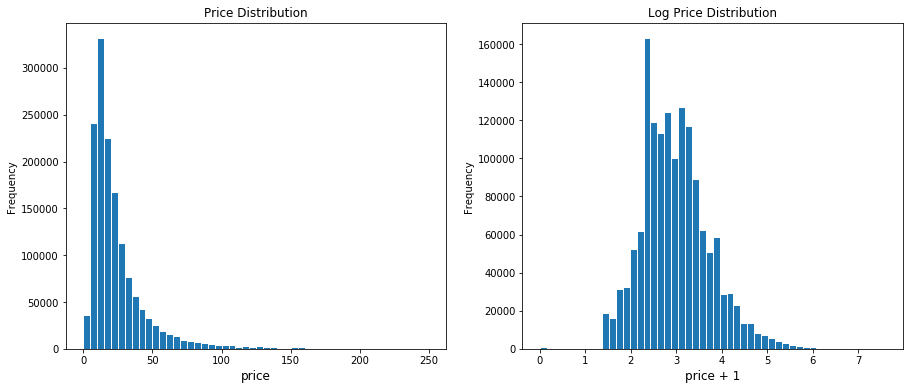

In [12]:
# Plot Price Distribution
plt.subplot(1, 2, 1)
train['price'].plot.hist(bins=50, figsize=(15, 6), edgecolor = 'white', range = [0, 250])
plt.xlabel('price', fontsize=12)
plt.title('Price Distribution', fontsize=12)


#Plot Log Price Distribution
plt.subplot(1, 2, 2)
np.log(train['price']+1).plot.hist(bins=50, figsize=(15, 6), edgecolor='white')
plt.xlabel('price + 1', fontsize=12)
plt.title('Log Price Distribution', fontsize=12)

plt.show()

## Remove Items with 0 Price

In [13]:
train[train.price == 0]

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
1325,1325,Alabama Crimson Tide Quality Lanyard,1,Sports & Outdoors/Fan Shop/NCAA,Unknown,0.0,1,TOP QUALITY THICK LANYARD Reversible sides wit...
2544,2544,Levi leggings,3,"Women/Jeans/Slim, Skinny",Levi's®,0.0,0,Light wash. Hardly worn. Size 24 but fits like...
2712,2712,Simple Red Lace Lingerie Top,3,Women/Underwear/G-Strings & Thongs,Unknown,0.0,0,"Very simple but cute, a little form fitting as..."
3576,3576,Turquoise 15 Pc Makeup Brush Set,1,Beauty/Tools & Accessories/Makeup Brushes & Tools,Unknown,0.0,1,1 left!
3761,3761,Girls size 7/8,3,Kids/Girls (4+)/Tops & T-Shirts,Unknown,0.0,1,5 pair gap jean excellent used condition 3 chi...
5237,5237,Nursing Bra,3,Women/Underwear/Bras,Motherhood Maternity,0.0,0,Used a few times but was not able to nurse
6175,6175,"Multi Listing Bundled Package, Thanks",2,Electronics/Media/DVD,Unknown,0.0,1,1)Large Collection of Full Length Strawberry S...
7116,7116,Nike Dri-Fit High Power Speed Tights,1,"Women/Athletic Apparel/Pants, Tights, Leggings",Nike,0.0,1,"Bought at Nike store in New York, Brand New, N..."
7622,7622,Hands free earpiece,1,Electronics/Cell Phones & Accessories/Headsets,Unknown,0.0,0,Wireless Bluetooth hands free used with Samsun...
10812,10812,Vampire candy bowl,1,Home/Seasonal Décor/Halloween,Unknown,0.0,0,New good condition for halloween


In [14]:
# We have 874 items with price of $0. Let's take them out because it looks like an error on their part. 
# Remove items with price of $0 from our training set
train = train[train.price != 0]

In [15]:
train.shape

(1481661, 8)

## Shipping Distribution

In [16]:
train.shipping.value_counts()/len(train)

0    0.552674
1    0.447326
Name: shipping, dtype: float64

## Price Distribution by Shipping Type

Looking at graph, it is seem that shipping increases with price value

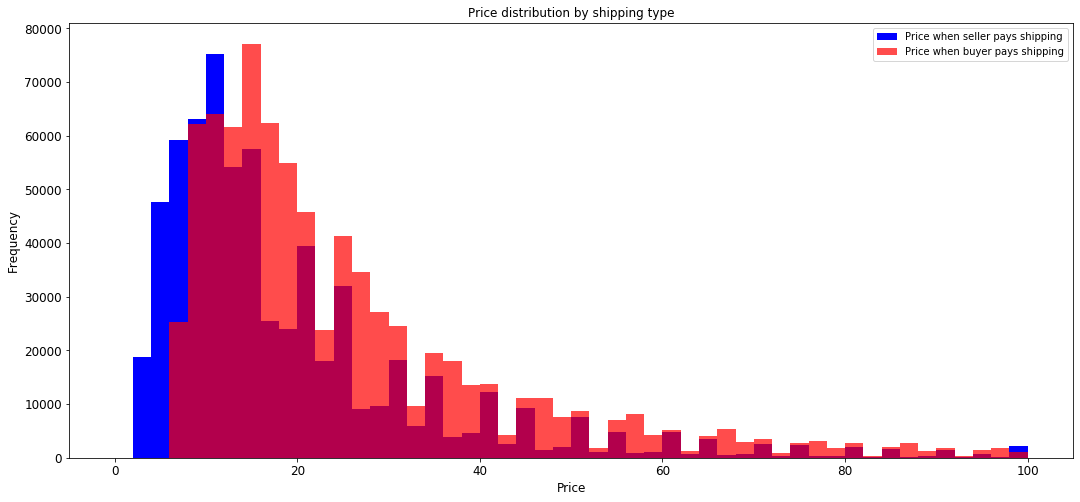

In [17]:
shipping_fee_by_buyer = train.loc[train.shipping == 0, 'price']
shipping_fee_by_seller = train.loc[train.shipping == 1, 'price']

fig, ax = plt.subplots(figsize=(18, 8))

ax.hist(shipping_fee_by_seller, color='blue', alpha=1.0, bins=50, range=[0, 100], label='Price when seller pays shipping')
ax.hist(shipping_fee_by_buyer, color='red', alpha=0.7, bins=50, range=[0, 100], label='Price when buyer pays shipping')

plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Price distribution by shipping type', fontsize=12)
plt.tick_params(labelsize=12)
plt.legend()
plt.show()

## Average price for shipping type

In [18]:
print('The average price is {}'.format(round(shipping_fee_by_buyer.mean(), 2)) , 'when buyer pays the shipping')
print('The average price is {}'.format(round(shipping_fee_by_seller.mean(), 2)), 'when seller pays the shipping')

The average price is 30.13 when buyer pays the shipping
The average price is 22.58 when seller pays the shipping


## Top 10 categories

In [19]:
top_categories = train['category_name'].value_counts()[0:10].reset_index()
top_categories

,index,category_name
0,"Women/Athletic Apparel/Pants, Tights, Leggings",60152
1,Women/Tops & Blouses/T-Shirts,46349
2,Beauty/Makeup/Face,34320
3,Beauty/Makeup/Lips,29901
4,Electronics/Video Games & Consoles/Games,26547
5,Beauty/Makeup/Eyes,25200
6,"Electronics/Cell Phones & Accessories/Cases, C...",24668
7,Women/Underwear/Bras,21254
8,"Women/Tops & Blouses/Tank, Cami",20270
9,Women/Tops & Blouses/Blouse,20269


## Top 10 categories distribution

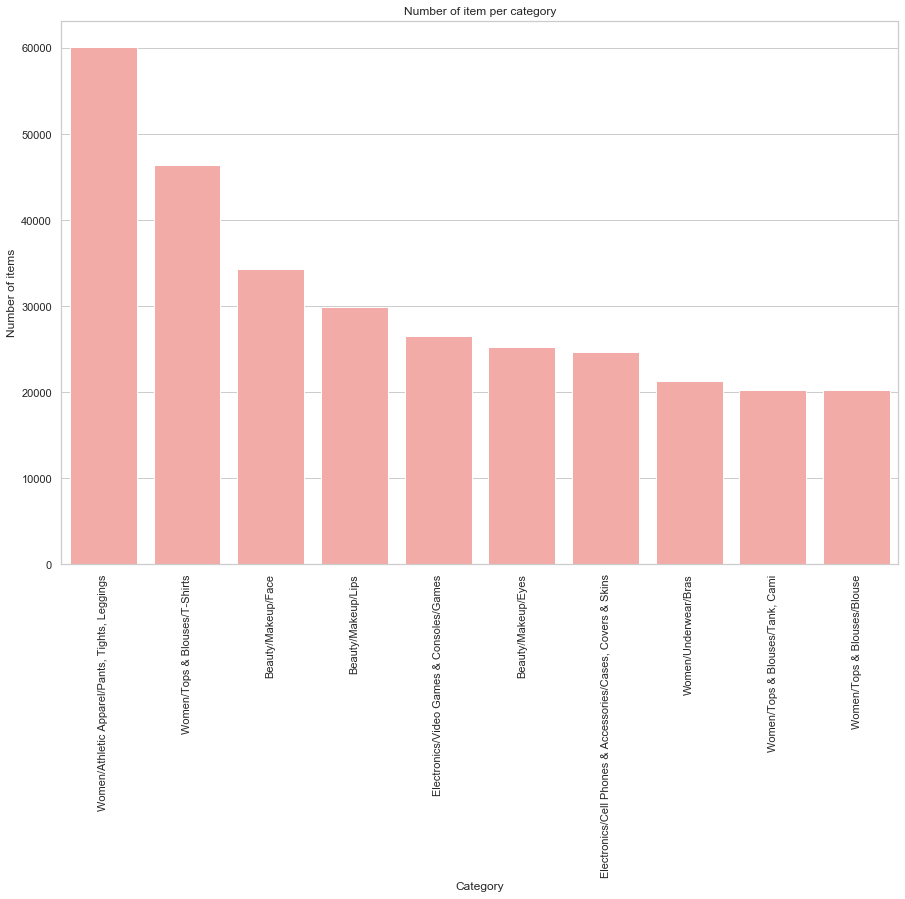

In [105]:
sns.set(style='whitegrid')


# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 10))


# Plot the total items per category
sns.set_color_codes('pastel')
chart = sns.barplot(x='index', y='category_name', data=top_categories, color='r', label='Number of items per category')


# Add a legend and informative axis label
ax.set( ylabel='Number of items', title='Number of item per category', xlabel='Category')
plt.xticks(rotation='vertical')

plt.show()

## Create new Feature by Splitting Category

There's a format in the category feature: **Root Category/Category/Subcategory**. In the given dataset also it is following the same trend so we need to split the category and save each of them in a separate column.

In [21]:
#Feature Engineering : Creating new feature Category
def category_tranformation(category):
    try:
        cat, sub_cat_1, sub_cat_2 = category.split('/')
        return cat, sub_cat_1, sub_cat_2
    except:
        return 'Other', 'Other', 'Other'
        

In [23]:
train['main_category'], train['category_sub1'], train['category_sub2'] = zip(*train['category_name'].apply(category_tranformation))
train_category = train[['main_category','category_sub1','category_sub2','price']]
train_category.head()

,main_category,category_sub1,category_sub2,price
0,Men,Tops,T-shirts,10.0
1,Electronics,Computers & Tablets,Components & Parts,52.0
2,Women,Tops & Blouses,Blouse,10.0
3,Home,Home Décor,Home Décor Accents,35.0
4,Women,Jewelry,Necklaces,44.0


## Top 10 Categories

Women products, Makeup and Kids products are highest categories. Its insightful to know the top users and can be used for targeted marketing

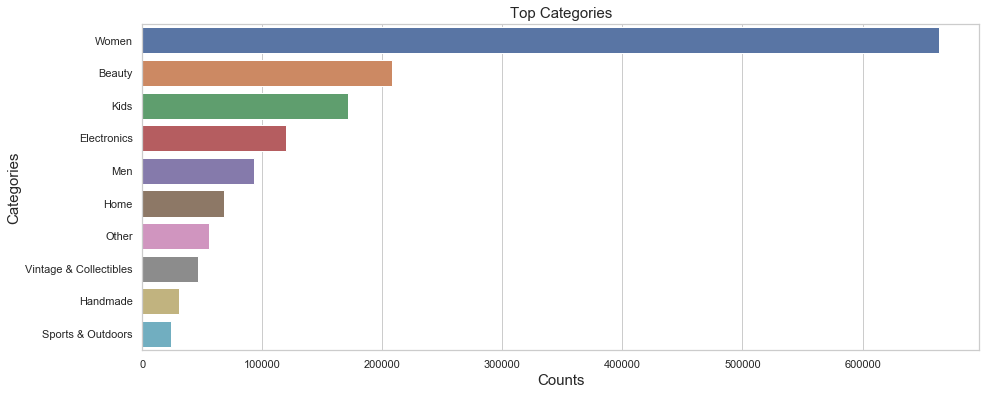

In [44]:
plt.figure(figsize=(15,6))
sns.countplot(y=train['main_category'], order=train['main_category'].value_counts().index)
plt.title('Top Categories', fontsize=15)
plt.xlabel('Counts', fontsize=15)
plt.ylabel('Categories', fontsize=15)
plt.show()

## Ratio of main Categories
Women takes up about 45 percent of the main category

In [25]:
# Ratio of categories to Total no of items
train['main_category'].value_counts()/len(train)

Women                     0.448139
Beauty                    0.140197
Kids                      0.115786
Electronics               0.080705
Men                       0.062964
Home                      0.045780
Other                     0.037814
Vintage & Collectibles    0.031397
Handmade                  0.020810
Sports & Outdoors         0.016408
Name: main_category, dtype: float64

## Brand Analysis

There are 4808 unique brands available 

In [26]:
train['brand_name'].nunique()

4808

In [27]:
#top 20 brand distribution
brands = train['brand_name'].value_counts()[1:20].reset_index().rename(columns={'index' : 'brand_name', 'brand_name':'count'})
brands.head()

,brand_name,count
0,PINK,54072
1,Nike,54006
2,Victoria's Secret,48011
3,LuLaRoe,30995
4,Apple,17314


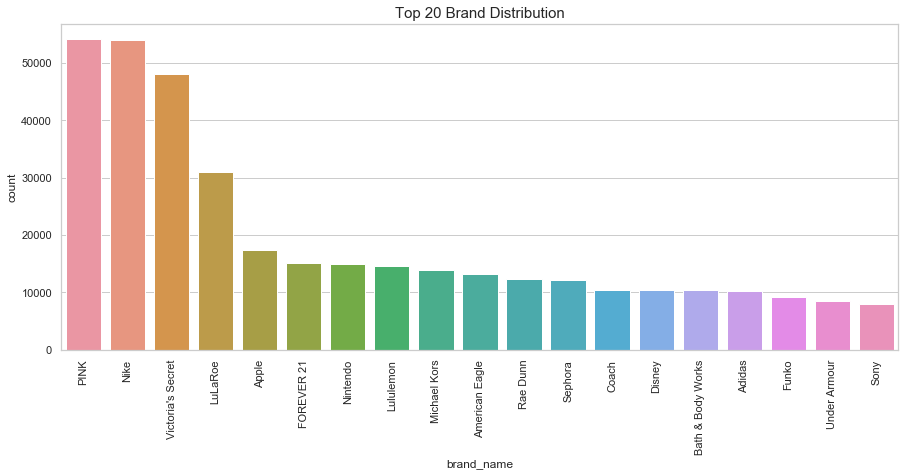

In [45]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x="brand_name", y="count", data=brands)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Top 20 Brand Distribution', fontsize=15)
plt.show()

## Top 20 Expensive Brands

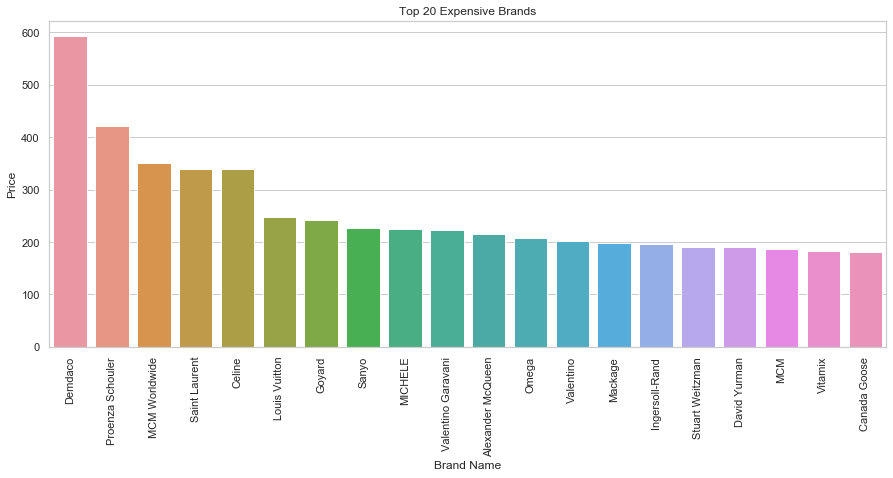

In [53]:
top_20_expensive_brands = pd.DataFrame(train.groupby(['brand_name'], as_index=True).std().price.sort_values(ascending=False)[0:20]).reset_index()
plt.figure(figsize=(15, 6))
ax = sns.barplot(x="brand_name", y="price", data=top_20_expensive_brands)
ax.set_xlabel("Brand Name", fontsize=12)
ax.set_ylabel("Price", fontsize=12)
ax.set_title("Top 20 Expensive Brands", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [47]:
train.groupby(['brand_name'], as_index=True)

## Length of Description Vs Price

Does the length of Description has some effect on Pricing?

In [54]:
train.item_description = train['item_description'].astype(str)

In [59]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
item_descs = train[['name', 'item_description','price']]
item_descs['desc_length'] = item_descs['item_description'].apply(lambda x : len(str(x)))
item_descs.head()

,name,item_description,price,desc_length
0,MLB Cincinnati Reds T Shirt Size XL,No description yet,10.0,18
1,Razer BlackWidow Chroma Keyboard,This keyboard is in great condition and works ...,52.0,188
2,AVA-VIV Blouse,Adorable top with a hint of lace and a key hol...,10.0,124
3,Leather Horse Statues,New with tags. Leather horses. Retail for [rm]...,35.0,173
4,24K GOLD plated rose,Complete with certificate of authenticity,44.0,41


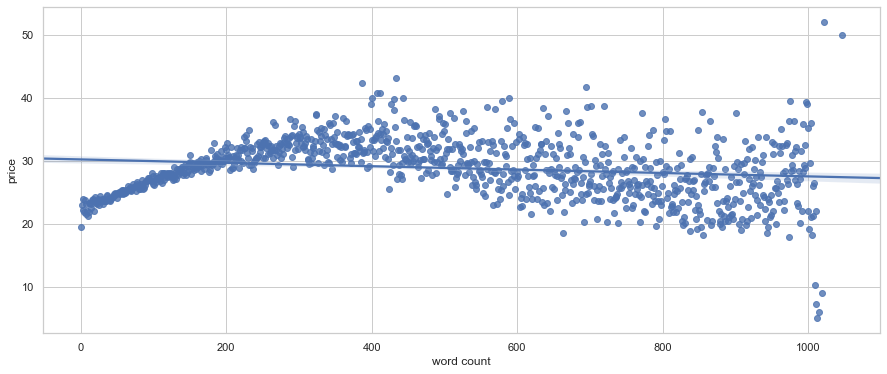

In [67]:
df = item_descs.groupby('desc_length')['price'].mean().reset_index()
plt.figure(figsize=(15, 6))
sns.regplot(x=df["desc_length"], y = df["price"])
plt.xlabel('word count')
plt.show()

# Text Processing
***
Let's normalize the words by -
- Removing Punctuations
- Removing Stopwards
- Convert the words to Lowercase
- Stemming the words

## List of Punctuations

In [71]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [73]:
#create a list of punctuation replacements 
punctuation_list = []

for symbol in punctuation:
    punctuation_list.append((symbol, ''))

punctuation_list

[('!', ''),
 ('"', ''),
 ('#', ''),
 ('$', ''),
 ('%', ''),
 ('&', ''),
 ("'", ''),
 ('(', ''),
 (')', ''),
 ('*', ''),
 ('+', ''),
 (',', ''),
 ('-', ''),
 ('.', ''),
 ('/', ''),
 (':', ''),
 (';', ''),
 ('<', ''),
 ('=', ''),
 ('>', ''),
 ('?', ''),
 ('@', ''),
 ('[', ''),
 ('\\', ''),
 (']', ''),
 ('^', ''),
 ('_', ''),
 ('`', ''),
 ('{', ''),
 ('|', ''),
 ('}', ''),
 ('~', '')]

## List of Stop words

In [75]:
# Examine list of stopwords
from nltk.corpus import stopwords
stopwords = stopwords.words('English')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Create functions to normalize the words

In [79]:
import string

# create a function to remove punctuations
def remove_punctuation(sentence: str) -> str:
    return sentence.translate(str.maketrans('', '', string.punctuation))

# create funcion to remove stopwords
def remove_stopwords(x):
    x = ' '.join([i for i in x.lower().split(' ') if i not in stopwords])
    return x

# create a function to convert words to lowercase
def to_lowercase(x):
    return x.lower()

## Apply normalizing functions

In [80]:
#stem the words
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

train['item_description'] = train['item_description'].apply(porter.stem)
train['item_description'] = train['item_description'].apply(remove_punctuation)
train['item_description'] = train['item_description'].apply(remove_stopwords)
train['item_description'] = train['item_description'].apply(to_lowercase)

train['name'] = train['name'].apply(remove_punctuation)
train['name'] = train['name'].apply(remove_stopwords)
train['name'] = train['name'].apply(to_lowercase)

## Feature Extraction with Text

**Feature Pre-Processing:**
Sometimes you can't just fit a dataset into your model and expect good results. Each type of feature has their own way of preprocessing. Choice of preprocessing method also depends on the model we are trying to use.

Since we're working with Text Features, we're going to do a lot of vectorization:
- Tokenization: split each text into words (bag of words model)
- Stemming: removing word inflections (getting the root word)
- Vectorization: reducing text into a vector with different types of frequencies for each word (Count Values or TF-IDF Values)


## Bag of Words
When we vectorize these words, we're doing creating a feature for each word. Also known as, **Bag of Words**. **We lose word ordering**

**Solution**: To preserve some ordering, we can introduce **n-grams** into our vectorization of words (problem: too many features)
- one way to reduce dimensions of n-grams is to remove stop words (a, the, is)
- **stop words**: we can remove these words becaues they are just there for grammatical structure with little to no meaning
- **n-gram** with smaller frequencies can highlight and capture important parts of a document/text. This **preserves local ordering** and **can improve model performance**.



In [82]:
#Examine and normalize item description
train['item_description'][140:150]

140                                                  new
141                                         around 3or 4
142    gray american flag flaws defects thick warm si...
143    super cute lauren conrad light pink chiffon po...
144    great dog toy got gift dog already toy incredi...
145    sz 10 never worn comes receipt dont sleep fres...
146    teal blue lululemon sucba jacket jacket good c...
147                               authentic price negoti
148    hold katie schunk pyrex speckled lines chip di...
149    upgraded finally getting rid iphone 5c phone u...
Name: item_description, dtype: object

In [88]:
from nltk.tokenize import word_tokenize
text1 = train['item_description'][144]
tokens = word_tokenize(text1)
print(tokens)

['great', 'dog', 'toy', 'got', 'gift', 'dog', 'already', 'toy', 'incredibly', 'durable', 'bounces', 'floats', 'dishwasher', 'safe', 'nwt']


## Word Frequency Weights
Each word in our feature space can have different frequency weights
- Frequency Weight
- TF-IDF Weight
- Binary


**CountVectorizer**: Returns an encoded vector with integer count for each word

**TF-IDF(min_df, max_df, n-gram)**: Returns encoded vector with weighted count for each word (utilizes the word in the document in corresponsdence to the whole corpus, to keep it short, more emphasis on the rarity of a word).  This is good because we want to find frequent terms from that document that isn't so frequent within the whole document corpus.

**LabelBinarizer**: Get's all the word and assigns it to its own column. 0 means it's there and 1 means not (example with brand names)

**Why are we doing this again?**: Because some Machine Learning models don't recognize text as well. You're going to have to convert it into numbers 


## Feature Engineering
Extra Feature Engineering Ideas
- Character Count
- Word Count
- Number of Unique Words
- Average Post Length of Main Category
- If brand yes/no feature
- Etc..

In [90]:
train.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description', 'main_category',
       'category_sub1', 'category_sub2'],
      dtype='object')

### Categorical Variables (Need to do Encoding):
How should we encode these features?
- name
- brand_name
- category_main, category_sub1, category_sub2
- item_description
- shipping
- item_condition_id

### Count Venctorizer

In [91]:
# Count Vectorizer for name and categories columns
cv = CountVectorizer(min_df=10)
X_name = cv.fit_transform(train['name'])
X_category_main = cv.fit_transform(train['main_category'])
X_category_sub1 = cv.fit_transform(train['category_sub1'])
X_category_sub2 = cv.fit_transform(train['category_sub2'])

In [93]:
print('Item Name shape: ' + str(X_name.shape))
print('Category shape: ' + str(X_category_main.shape))
print('Category Sub 1 shape: ' + str(X_category_sub1.shape))
print('Category Sub 2 shape: ' + str(X_category_sub2.shape))

Item Name shape: (1481661, 18310)
Category shape: (1481661, 12)
Category Sub 1 shape: (1481661, 141)
Category Sub 2 shape: (1481661, 805)


## Label Binarizer

In [94]:
# Apply LabelBinarizer to Brand Name
lb = LabelBinarizer(sparse_output=True)
X_brand = lb.fit_transform(train['brand_name'])

In [95]:
print('Brand Name Shape :' + str(X_brand.shape))

Brand Name Shape :(1481661, 4808)


## Get Dummies

In [96]:
# apply get dummies to item_condition_id and shipping
X_dummies = csr_matrix(pd.get_dummies(train[['item_condition_id','shipping']], sparse=True).values)

# TFIDF
**Main Goal:** Measure hwo important a word or phrase is within a collection of documents. It essentially **weigh down** terms that appear frequently and **scale up** unique terms.

**TF Term Frequency** how often a term occurs 

**IDF Inverse Document Frequency** how important a term is

### Important Parameters
1. ngram_range 
2. stop_words 
3. lowercase 
4. max_df - max threshold that will ignore a term that has a document frequency higher than the threshold
5. min_df - min threshold that will ignore a term that has a document frequency lower than the threshold
6. max_features - gets the assigned amount of features with highest amount of term frequencies (scores)


In [97]:
# Perform a TFIDF Transformation of the item description with the top 55000 features and has an n-gram range of 1-2
tv = TfidfVectorizer(max_features = 55000, ngram_range=(1, 2), stop_words='english')
X_description = tv.fit_transform(train['item_description'])

In [98]:
print('Item Description shape: ' + str(X_description.shape))

Item Description shape: (1481661, 55000)


### Observing TFIDF weight

In [99]:
# create a dictionary mapping the tokens to their tfidf values
tfidf = dict(zip(tv.get_feature_names(), tv.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
tfidf.columns = ['tfidf']
#lowest TFIDF Scores
tfidf.sort_values(by=['tfidf'], ascending=True).head(10)

,tfidf
new,2.186923
size,2.351671
brand,2.758520
brand new,2.883562
free,2.939369
condition,3.041650
worn,3.111408
used,3.257837
great,3.347659
shipping,3.382451


In [100]:
# Highest TFIDF Scores
tfidf.sort_values(by=['tfidf'], ascending=False).head(10)

,tfidf
beats beats,13.011450
evod pro,12.723768
shipped containers,12.436086
pairrm pairrm,12.375462
ijust,12.264236
wide weft,12.212943
guards shade,12.164153
3ml teeth,12.164153
comment rm,12.117633
led teeth,12.117633


### Combine all Features into one Merge

In [101]:
# combing everything together
sparse_merge = hstack((X_dummies, X_description, X_brand, X_name, X_category_main, X_category_sub1, X_category_sub2)).tocsr()